In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
# Referência: https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html
from scipy import sparse
import time
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import path
from wordcloud import WordCloud

/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
start_time = time.time()


resenhas_imdb = pd.read_csv('../../dados_imdb/imdb-reviews-pt-br.csv')

'''
# PARA MOSTRAR TODOS
#https://stackoverflow.com/questions/62207066/pandas-does-not-show-the-complete-csv-file
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(resenhas_imdb)
'''

resenhas_imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
resenhas_imdb['classificacao'] = resenhas_imdb['sentiment'].replace(['neg', 'pos'], [0,1])

In [4]:
print(resenhas_imdb['sentiment'].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [5]:
print(resenhas_imdb['classificacao'].value_counts())

0    24765
1    24694
Name: classificacao, dtype: int64


In [6]:
def treinar_classificador():

    vetorizador = CountVectorizer(lowercase=False, max_features=400)
    bag_of_words = vetorizador.fit_transform(resenhas_imdb['text_pt'])
    
    
    '''
    matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                      columns=vetorizador.get_feature_names())
    '''
    
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenhas_imdb.classificacao,
                                                              random_state = 42)
    
    # https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    # https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
    regressao_logistica = LogisticRegression(solver='lbfgs', max_iter=200)
    regressao_logistica.fit(treino, classe_treino)
    acuracia = regressao_logistica.score(teste, classe_teste)

    return acuracia

# https://www.ic.unicamp.br/~mc102/mc102-1s2019/labs/format.html
print('Acurácia %.2f%%' % (treinar_classificador() * 100))

Acurácia 80.84%


In [20]:
def plotar_nuvem_palavras(sentimento=None):

    if sentimento is None:
        textos_filtrados = resenhas_imdb
    else:
        textos_filtrados = resenhas_imdb.query("sentiment == '%s'" % sentimento)

    '''
    WORDCLOUD
    https://amueller.github.io/word_cloud/auto_examples/simple.html
    '''
    # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
    # d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

    # Read the whole text.
    # text = open(path.join(d, 'constitution.txt')).read()
    text = ''.join([texto for texto in textos_filtrados['text_pt']])
    # Generate a word cloud image
    wordcloud = WordCloud(  # width=400,
        # height=500,
        max_font_size=40,
        collocations=False).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

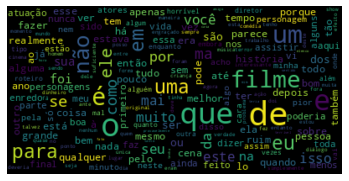

In [21]:
plotar_nuvem_palavras('neg')

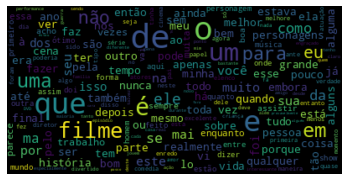

In [22]:
plotar_nuvem_palavras('pos')

In [8]:
tempo_execucao = time.time() - start_time
print('-----Tempo de execução: %s segundos' % tempo_execucao)

-----Tempo de execução: 95.52648997306824 segundos
